# PCA (Principal Component Analysis)
主成份分析」
- 課本 5.09
- [機器/統計學習:主成分分析](https://chih-sheng-huang821.medium.com/%E6%A9%9F%E5%99%A8-%E7%B5%B1%E8%A8%88%E5%AD%B8%E7%BF%92-%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90-principle-component-analysis-pca-58229cd26e71)



In [6]:
#示範用測試資料
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("data/heart.csv")
x = data.drop('target',axis=1)
y = data['target']
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 欄位間的相關性
當欄位之間有高相關性時，會容易影響預測。

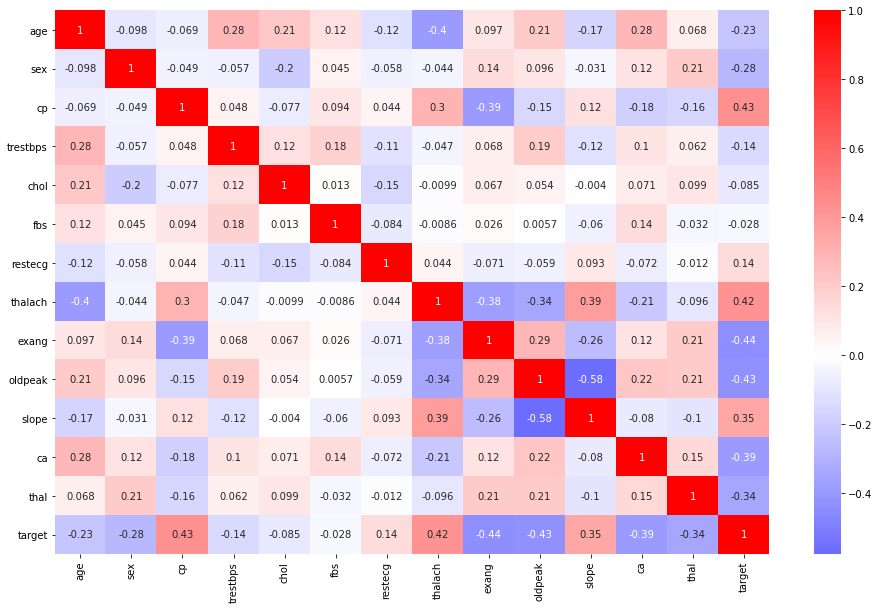

In [3]:
sns.heatmap(data.corr(),annot=True,cmap='bwr',center=0)
fig=plt.gcf()  # Get the current figure.
fig.set_size_inches(16,10)

譬如一個極端的例子：<BR>
把age這個欄位複製三次分別變成三個新欄位['age2','age3','age4']時，則age的重要性會被放大四倍。

In [7]:
x['age2'] = x['age']
x['age3'] = x['age']
x['age4'] = x['age']
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,age2,age3,age4
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,63,63,63
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,37,37,37
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,41,41,41
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,56,56,56
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,57,57,57


## 找出STD最大的軸

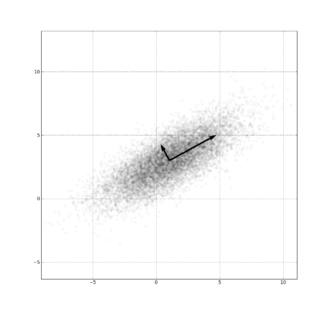

資料點在某個特定直線上的投影
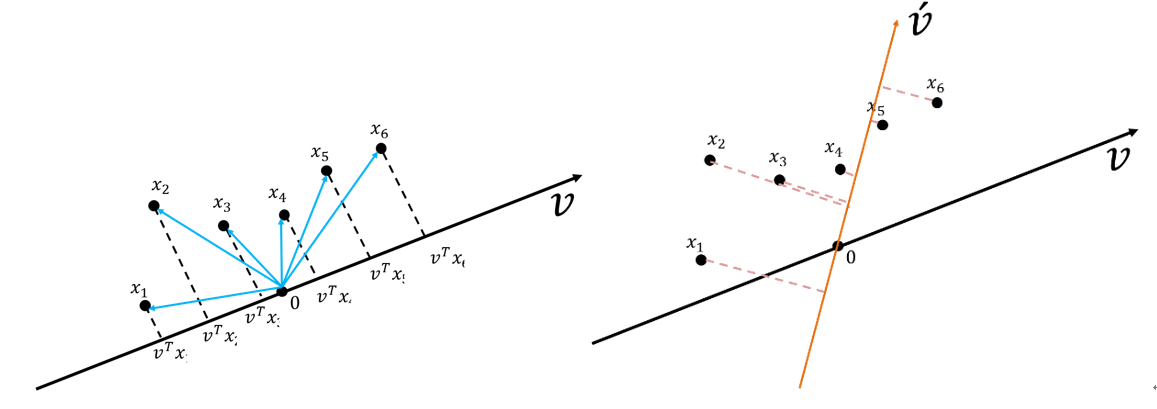

## PCA的概念
- 如果資料的STD越大則越容易預測。
- 找出一條直線，使得所有資料點在這條直線上的投影點的STD越大越好。
- 欄位間的相關性越低越好
- 直角垂直線的相關性為0
- 找出第二條線垂直於第一條線，且STD越大越好
- 周而復始的找出其他的線，最終每條線都互相垂直

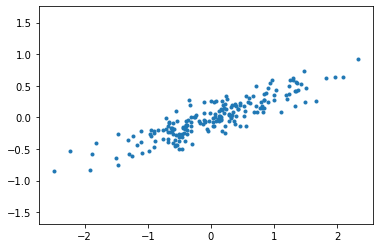

In [8]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1],marker='.')
plt.axis('equal');

In [9]:
# 計算PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [10]:
# PCA 的座標轉換矩陣
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [7]:
# 每個座標的變異，越大越重要
print(pca.explained_variance_)

[0.7625315 0.0184779]


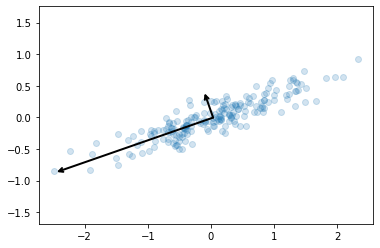

In [8]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

原始座標 VS PCA座標
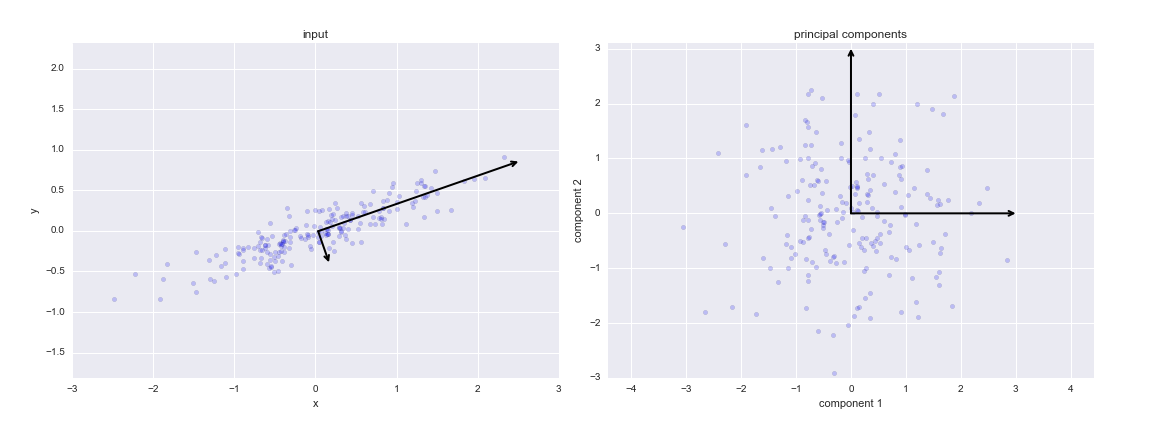

## 測試 Heart

In [9]:
# 原始資料
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

data = pd.read_csv("data/heart.csv")
x = data.drop('target',axis=1)
y = data['target']

model = SVC()
# model = KNeighborsClassifier()
scores = cross_val_score(model,x,y,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.60655738 0.60655738 0.73770492 0.68333333 0.58333333]
0.6434972677595628


In [10]:
# PCA後資料
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

data = pd.read_csv("data/heart.csv")
x = data.drop('target',axis=1)
y = data['target']
pca = PCA()
pca.fit(x.to_numpy())
x_pca = pca.transform(x.to_numpy())
x_pca

model = SVC()
# model = KNeighborsClassifier()
scores = cross_val_score(model,x_pca,y,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.62295082 0.67213115 0.63934426 0.7        0.68333333]
0.663551912568306


## 測試 Iris

In [28]:
# 原始資料
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

data = pd.read_csv("data/iris.csv")
x = data.drop(['Id','Species'],axis=1)
y = data['Species']

model = SVC()
# model = KNeighborsClassifier()
scores = cross_val_score(model,x,y,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
0.9666666666666666


In [27]:
# PCA後資料
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

data = pd.read_csv("data/iris.csv")
x = data.drop(['Id','Species'],axis=1)
y = data['Species']
pca = PCA()
pca.fit(x.to_numpy())
x_pca = pca.transform(x.to_numpy())
x_pca

model = SVC()
# model = KNeighborsClassifier()
scores = cross_val_score(model,x_pca,y,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.96666667 1.         0.96666667 0.96666667 1.        ]
0.9800000000000001


## PCA as dimensionality reduction

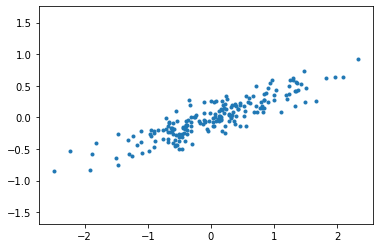

In [29]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1],marker='.')
plt.axis('equal');

In [30]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


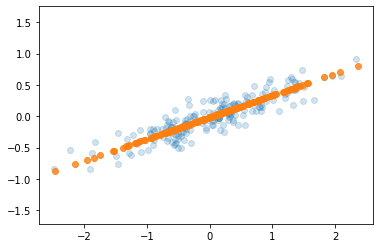

In [31]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

## PCA as dimensionality reduction

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

Here is an example of using PCA as a dimensionality reduction transform:

In [32]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

The transformed data has been reduced to a single dimension.
To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

In [33]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


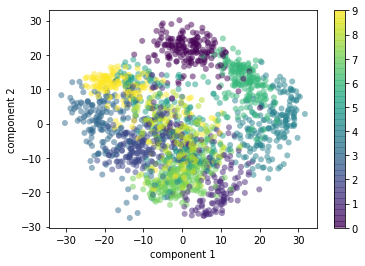

In [35]:
# 將 64維的手寫文字投影套 2維空間
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

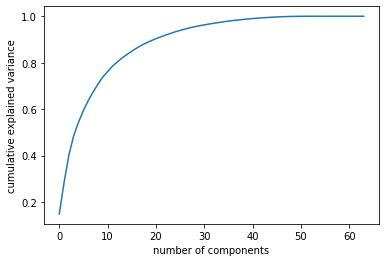

In [37]:
# PCA 的越後面的座標解釋力越弱
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## PCA as Noise Filtering

PCA can also be used as a filtering approach for noisy data.
The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise.
So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

Let's see how this looks with the digits data.
First we will plot several of the input noise-free data:

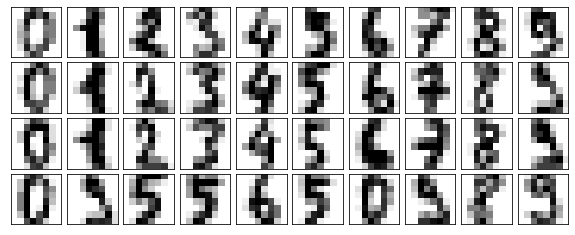

In [38]:
# 原始的手寫數字圖像
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

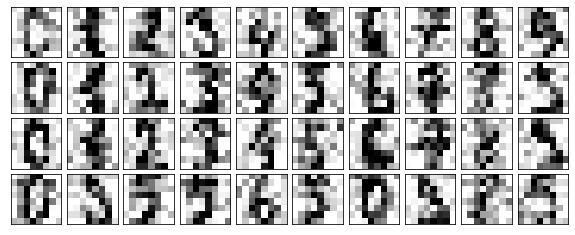

In [39]:
# 故意將原始的手寫數字圖像加入雜訊
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

It's clear by eye that the images are noisy, and contain spurious pixels.
Let's train a PCA on the noisy data, requesting that the projection preserve 50% of the variance:

In [47]:
# 0.5 表示轉換後只保留解釋力 > 0.5
pca = PCA(0.5).fit(noisy)
pca.n_components_  #計算發現12維度，解釋力就能達到

12

Here 50% of the variance amounts to 12 principal components.
Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits:

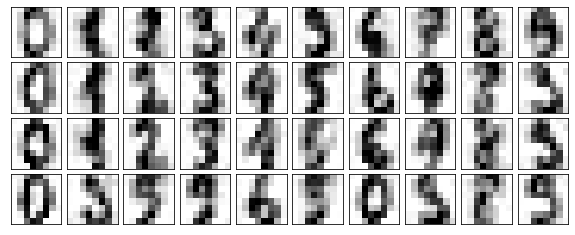

In [48]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)